In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import random
from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import pathlib
import PIL
import os
from os import walk

In [ ]:
plt.figure(figsize=(20,20))
test_folder=r'D:\CESI\A5\Data\Datasets\Unzip_nop\Photo'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [2]:
image_w=180
image_h=180
batch_s=32
data_dir= pathlib.Path('D:\\CESI\\A5\\Data\\Datasets\\Unzip_nop')

In [3]:
# Le train_set
train_set = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split= 0.2,
  subset = 'training',
  seed=42,
  image_size=(image_h,image_w),
  batch_size=batch_s
)
# Le test_set
test_set = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,  
  validation_split= 0.2,
  subset = 'validation',
  seed=42,
  image_size=(image_h,image_w),
  batch_size=batch_s
)

Found 31406 files belonging to 2 classes.
Using 25125 files for training.
Found 31406 files belonging to 2 classes.
Using 6281 files for validation.


In [4]:
class_names = train_set.class_names
print(class_names)

['Autre', 'Photo']


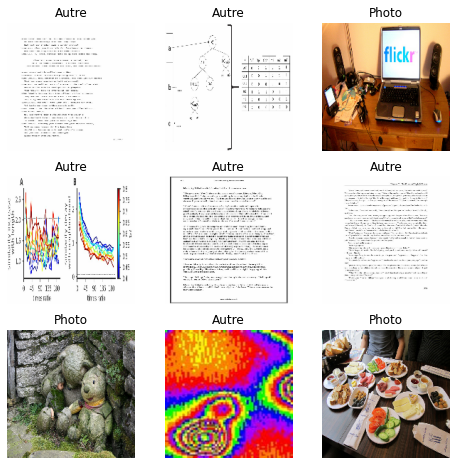

In [5]:
plt.figure(figsize=(8, 8))
for images, labels in train_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1) 
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [6]:
print(type(train_set))
images, labels = \
    iter(train_set).next() 
print(images.shape)
print(labels.shape)

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
(32, 180, 180, 3)
(32,)


In [7]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_set = test_set.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
num_classes = len(class_names) # Nombre de classes et donc aussi nombre de neurones dans la dernière couche
model = Sequential()

In [9]:
#Normalisation 
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(image_h, image_w, 3)))

In [10]:
# Couche convolutive
model.add(layers.Conv2D(16,3,padding="same", activation='relu'))
# Couche de pooling
model.add(layers.MaxPool2D())

In [11]:
# Bloc convolutif ou la taille du filtre est de (32, 3)
#A COMPLETER
model.add(layers.Conv2D(32,3,padding="same", activation='relu'))
model.add(layers.MaxPool2D())
# Bloc convolutif ou la taille du filtre est de (64, 3)
#A COMPLETER
model.add(layers.Conv2D(64,3,padding="same", activation='relu'))
model.add(layers.MaxPool2D())
# Applatissement de la couche
#A COMPLETER
model.add(layers.Flatten())
# Couche entièrement connectée (couche dense)
#A COMPLETER
model.add(layers.Dense(128,activation=keras.activations.softmax))
# Couche entièrement connectée retournant le résultat de la classification
#A COMPLETER
model.add(layers.Dense(num_classes))

In [14]:
#model.compile(optimizer = 'adam',
                  #loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  #metrics=['accuracy'])
model.compile(optimizer = \
              'adam',
              loss = \
              tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

Epoch 1/10
786/786 [==============================] - 567s 478ms/step - loss: 0.3940 - accuracy: 0.8989 - val_loss: 0.2699 - val_accuracy: 0.9411
Epoch 2/10
786/786 [==============================] - 261s 333ms/step - loss: 0.2392 - accuracy: 0.9362 - val_loss: 0.2165 - val_accuracy: 0.9430
Epoch 3/10
786/786 [==============================] - 261s 332ms/step - loss: 0.1985 - accuracy: 0.9411 - val_loss: 0.1761 - val_accuracy: 0.9473
Epoch 4/10
786/786 [==============================] - 249s 317ms/step - loss: 0.1695 - accuracy: 0.9467 - val_loss: 0.1779 - val_accuracy: 0.9392
Epoch 5/10
786/786 [==============================] - 244s 311ms/step - loss: 0.1542 - accuracy: 0.9508 - val_loss: 0.1778 - val_accuracy: 0.9280
Epoch 6/10
786/786 [==============================] - 257s 327ms/step - loss: 0.1435 - accuracy: 0.9543 - val_loss: 0.1434 - val_accuracy: 0.9559
Epoch 7/10
786/786 [==============================] - 331s 421ms/step - loss: 0.1324 - accuracy: 0.9593 - val_loss: 0.1520 -

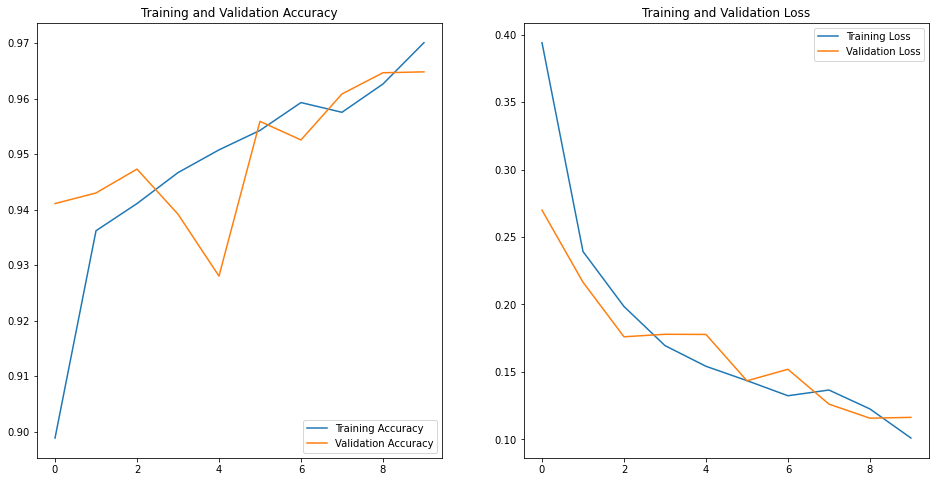

In [15]:
epochs=10
history = model.fit(train_set, validation_data=test_set, epochs=epochs, batch_size=batch_s)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
model.save('D:\\CESI\\A5\\Data\\Datasets\\Model\\CNNPhoto.h5')

In [18]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip(
                                                "horizontal", 
                                                 input_shape=(image_h, image_w, 3)),
    layers.experimental.preprocessing.RandomRotation(
                                                0.1),
    layers.experimental.preprocessing.RandomZoom(
                                                0.1),
  ]
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

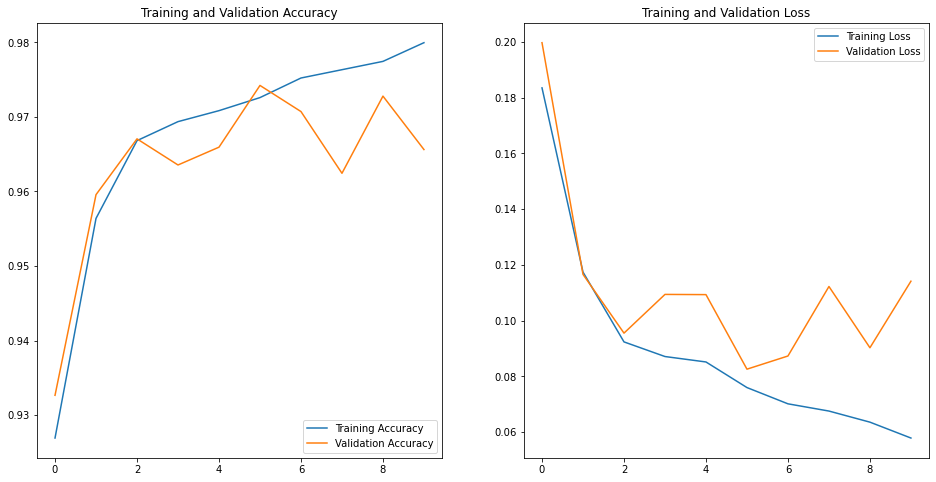

In [19]:
# Le modèle avec augmentation des données + dropout
epochs=10
complete_model = \
Sequential([ 
  data_augmentation, 
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'), 
  layers.MaxPooling2D(), 
  layers.Conv2D(32, 3, padding='same', activation='relu'), 
  layers.MaxPooling2D(), 
  layers.Conv2D(64, 3, padding='same', activation='relu'), 
  layers.MaxPooling2D(), 
  layers.Dropout(0.4), 
  layers.Flatten(), 
  layers.Dense(128, activation='relu'), 
  layers.Dense(num_classes) 
]) 
# Compilation du modèle
complete_model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy']) 
# Résumé du modèle
complete_model.summary() 
# Entrainement du modèle
history = complete_model.fit(train_set, validation_data=test_set, epochs=epochs) #SOLUTION
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
 
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs_range = range(epochs)
 
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
 
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
complete_model.save('D:\\CESI\\A5\\Data\\Datasets\\Model\\CNNPhoto_c.h5')